# Visualización Aplicada: Intro a Seaborn

En las siguientes sesiones vamos a ver de una forma más aplicada qué visualización podemos aplicar en función de los datos que necesitemos mostrar o queramos mostrar. Aprovecharemos además para mostrar como hacer la mayoría de esas visualizaciones con otra librería que debes conocer y manejar: Seaborn.

En esta sesión vamos a ver unas consideraciones generales a tener en cuenta a la hora de mostrar (visualizar) tus datos en una presentación de los mismos y luego dedicaremos la mayoría de la misma a entender la relación entre seaborn y matplotlib y como usarlas de forma combinada.

### Consideraciones Generales en Visualización

* La visualización para el **análisis NO es** la visualización para **presentar el resultado** del análisis

Esto es lo primero que te tiene que quedar claro, y ¿por qué es así? 

+ Primero, porque **TIENEN OBJETIVOS DISTINTOS**. El análisis nos sirve para extraer información importante, respuestas a nuestras preguntas. La presentación de resultados tiene como objetivo como mostrar esa información de la forma más relevante para el destinatrario de esos resultados. Ojo, si el destinatario eres tú mismo... O no hace falta que hagas una presentación a ti mismo, o entonces tú no eres el destinatario del resultado :-). 

Segundo, porque generalmente **TIENEN PÚBLICOS DISTINTOS**. El análisis es para ti o para un grupo de colaboradores (el análisis no es para tus jefes, salvo que sea colaborador en el proyecto, si tienes que mostrar el análisis a jefes consideralo una Presentación aunque en esa sí puedas/debas enseñar mucho del cómo). La presentación es para el que ha encargado el proyecto, para convencer a un tercero, para informar, para quedar tú como el gran sultán de los datos (es decir para un conjunto de "espectadores"), etc, etc.

De lo anterior surgen dos primeras guías importantes para  las visualizaciones:

+ En una ánalisis tus visualizaciones pueden contener todos los datos comparados que tu cerebro pueda admitir. El límite lo pones tú o el grupo de trabajo.

+ En una presentación la cantidad de información de la visualización depende del objetivo de la presentación. Si:

    * Es una **presentación de resultados y conclusiones**: La visualización debe contener **uno o como mucho dos DATOS destacados**, el resto aparecer como complemento estético o comparativo (no importa el dato en sí sino lo que refuerza o debilita a los anteriores), **por mensaje**. Y esos dos DATOS no son cualesquiera son los que mejor y más apoyen el mensaje que quieres transmitir.

    * Es una **exposición** de los mismos, por ejemplo **una infografía**: Entonces debe contener la mayor cantidad de **datos relevantes**, expuestos de la forma más **clara, significativa y separada** posible. 


Nosotros no vamos a ver el segundo caso. Para el arte de hacer infografías y EXPONER datos, algunas referencias: [Edward Tufte](https://es.wikipedia.org/wiki/Edward_Tufte) y su [página web](https://www.edwardtufte.com/), y una lista de blogs de infografías y visualizaciones expositivas, [aquí](https://www.webdatarocks.com/blog/top-data-visualization-blogs-to-follow/)

En las siguientes píldoras vamos a trabajar sobre la premisa de que queremos presentar nuestras conclusiones, no los datos. Pero **IMPORTANTE**: eso no quita que tus presentaciones lleven unos pedazo de anexos con todas las gráficas y datos, para cuando alguien pregunte. 

### Seaborn y Matpotlib

**Seaborn** es una biblioteca de visualización de datos en Python que está construida sobre Matplotlib. Se puede considerar como una extensión o un "wrapper" de Matplotlib que proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos y más informativos. Como matplotlib y pandas, con los que se lleva de maravilla, tiene su propio alias (que ya conoces). Empecemos las importaciones:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("./data/titanic.csv")

* Matplotlib es muy potente y fexible, pero Seaborn tiene una interfaz más accesible y estilos por defecto que son visualmente más atractivos. Seaborn integra de manera más profunda las estructuras de datos de Pandas y agrega capacidades de visualización estadística. Esto incluye funciones para crear gráficos complejos con menos código, como gráficos de distribución, matrices de correlación y muchos más. Por ejemplo, generar un gráfico de violín o un mapa de calor es más sencillo y directo con Seaborn.

* Además Seaborn nació con Pandas en la cabeza y facilita la visualización directa de DataFrames de Pandas, lo que es ideal para el análisis de datos.

* Usaremos Matplotlib para crear los subplots y ajustar los gráficos creados con Seaborn, ya que las figuras de Seaborn son, en el fondo, figuras de Matplotlib. Y luego usaremos los métodos de Matplotlib para personalizar los gráficos de Seaborn, como modificar los ejes, añadir títulos, etiquetas, y mucho más.

#### Ejemplo 1: *Pinta Seaborn, decora Matplotlib*

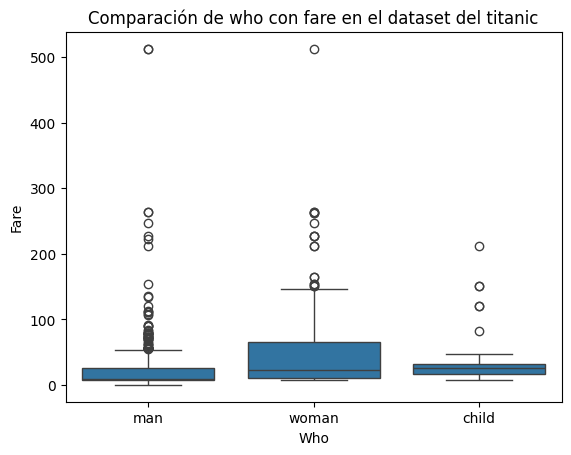

In [4]:
sns.boxplot(x = "who", y = "fare", data = df)

plt.title("Comparación de who con fare en el dataset del titanic")
plt.xlabel("Who")
plt.ylabel("Fare");

#### Ejemplo 2: *Configura Matplotlib, pinta Seaborn*

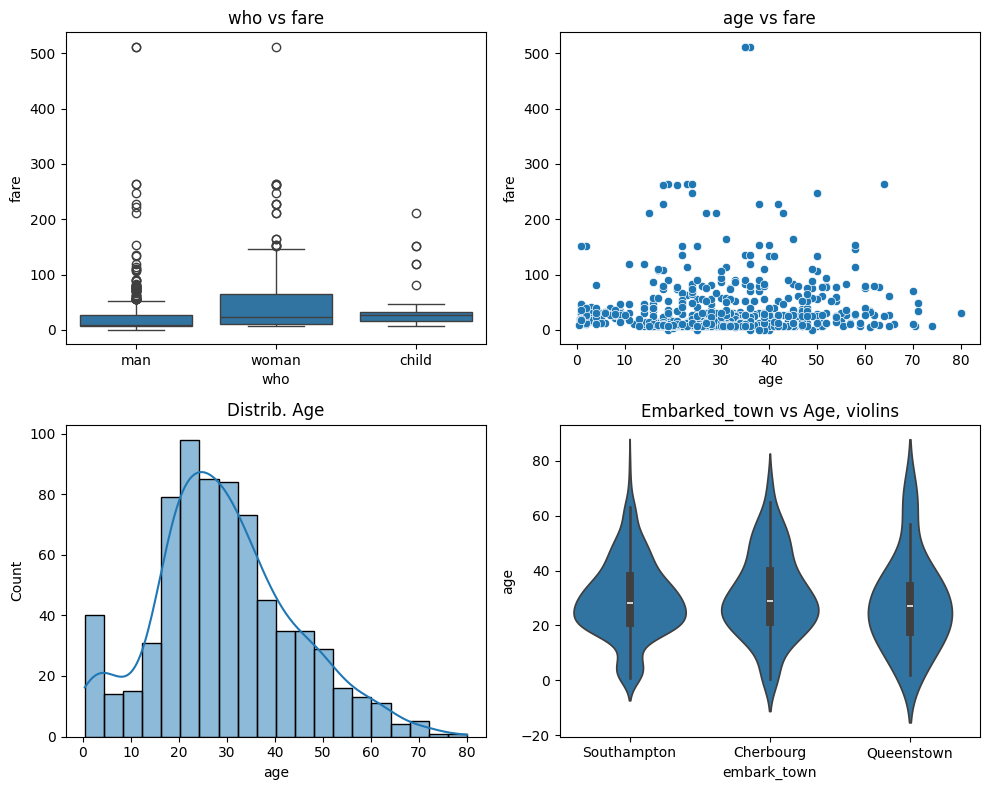

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Primer subplot con un gráfico de Seaborn
sns.boxplot(x='who', y='fare', data=df, ax=axs[0, 0])

# Segundo subplot con otro gráfico de Seaborn
sns.scatterplot(x='age', y='fare', data=df, ax=axs[0, 1])

# Tercer subplot
sns.histplot(df['age'], kde=True, ax=axs[1, 0])

# Cuarto subplot
sns.violinplot(x='embark_town', y='age', data=df, ax=axs[1, 1]);

axs[0,0].set_title("who vs fare")
axs[0,1].set_title("age vs fare")
axs[1,0].set_title("Distrib. Age")
axs[1,1].set_title("Embarked_town vs Age, violins")

plt.tight_layout()



# Visualización Aplicada: Mostrando una Variable Categórica

In [6]:
sns.set(color_codes = True)

df_titanic = pd.read_csv("./data/titanic.csv")
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")

* **Cuándo**: Análisis univariante de frecuencias y presentación de distribución de valores cuando esto aporte algo (en general para introducciones y dar contexto). Los diagramas de tarta y queso funcionan mejor con frecuencias relativas que con absolutas. Los lolipops no son de mi gusto, pero para que tengas otros.

* **Cuándo no**: Incluso en la situación de que sea necesario por dar contexto hablar de los valores de una variable categórica, si la cardinalidad es mayor de 5 (más o menos) reducirla mostrando 4-5 valores como mucho colapsando los no interesantes en un grupo "otros" (ojo, los no interesantes no son los de menor frecuencia son los que no aporten nada a los mensajes a transmitir )

### Barras

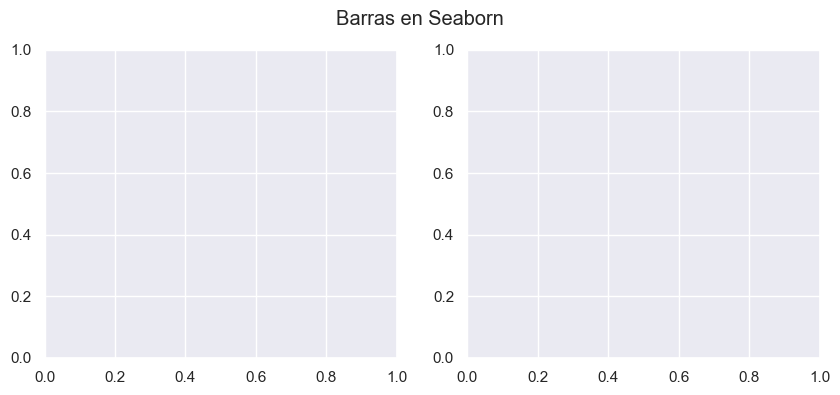

In [7]:
### Creamos figura y axes
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Barras en Seaborn"); #---> fig.suptitle = "set up title", da un título global a las 4 figuras



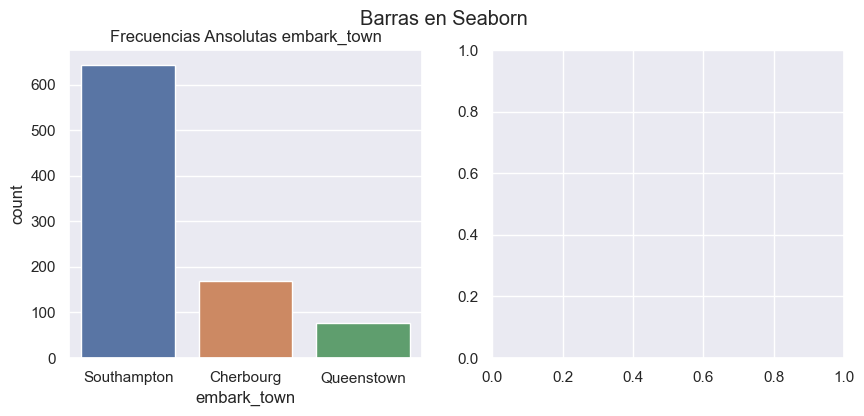

In [8]:
### Countplot, nos permite frecuencias

sns.countplot(x = "embark_town", data = df_titanic, ax = axs[0], hue = "embark_town", legend = False) #---> hue da un color diferente a cada valor de embark_town
axs[0].set_title("Frecuencias Ansolutas embark_town")

fig

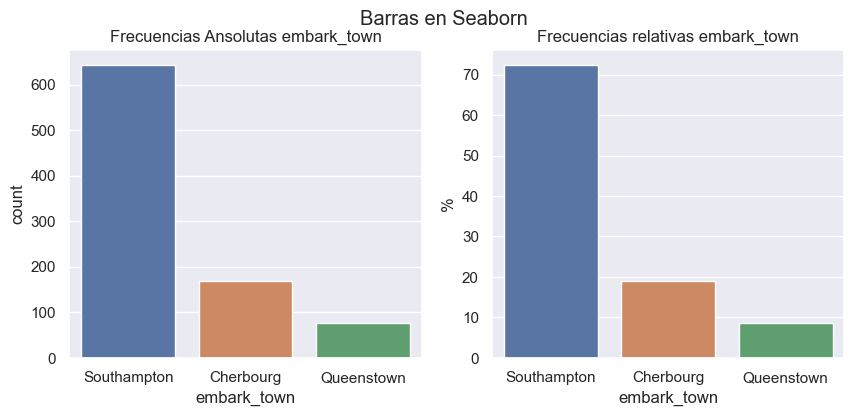

In [9]:
valores = df_titanic.embark_town.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativas embark_town")
axs[1].set_ylabel("%")
fig

### Circulos

Text(0.5, 0.98, 'Cículos en Seaborn')

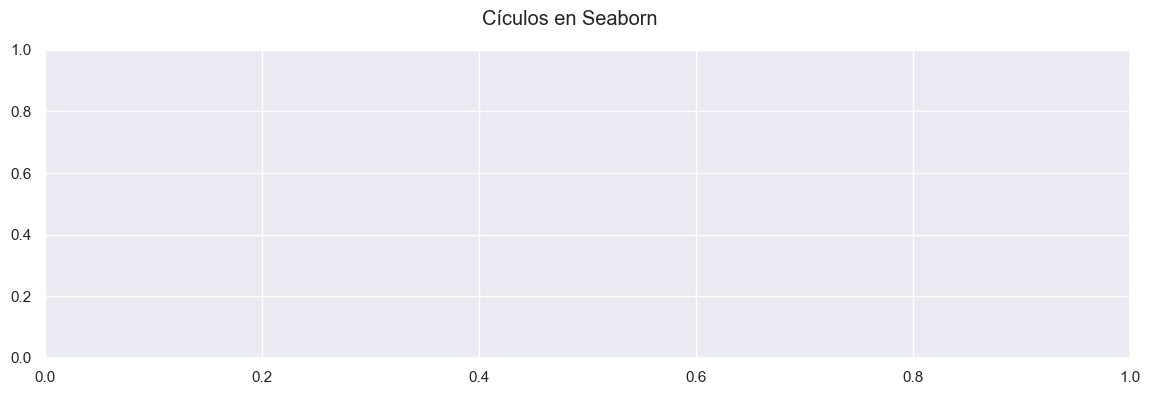

In [10]:
# Creamos figura y axes

fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (14, 4))
fig.suptitle("Cículos en Seaborn")

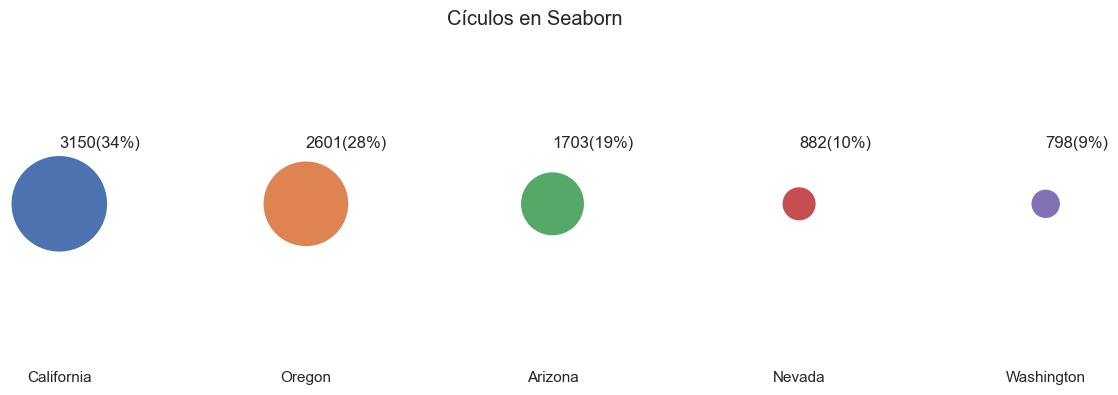

In [11]:
### Frecuencias absolutas y relativas

frecuencias = df_seguros["state"].value_counts()
df_frecuencias = df_seguros["state"].value_counts().reset_index()
df_frecuencias.columns = ["categorias","frecuencias"]
sns.scatterplot(x = "categorias", y = [1]*len(frecuencias), hue = "categorias", data = df_frecuencias, size = "frecuencias", legend = False, ax = axs, sizes = (500,5000))
axs.set_xlabel("")
for estado,valor in frecuencias.items():
    axs.text(estado,1.02,f"{valor}({round(valor*100/frecuencias.sum())}%)")
axs.set_facecolor("none") #---> quita el color de fondo de la cuadrícula
axs.yaxis.set_ticks([]) #---> quita los puntos de y
fig

### Donuts, tartas, quesos

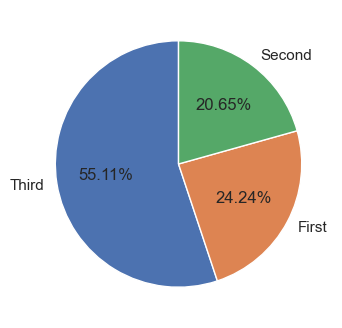

In [12]:
data = df_titanic["class"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))

ax.pie(data.values,
        labels=data.index,
        autopct='%.2f%%', startangle= 90);

Ahora tipo donut:

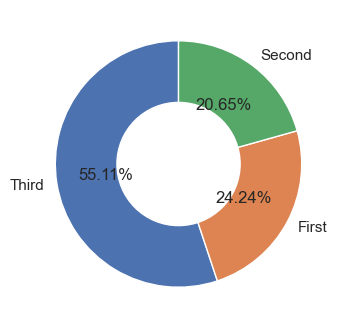

In [13]:
my_circle = plt.Circle((0,0),
                       0.5,     #---> Grosor del donnut
                       color = "white")   

ax.add_artist(my_circle)
fig

### Lolipops

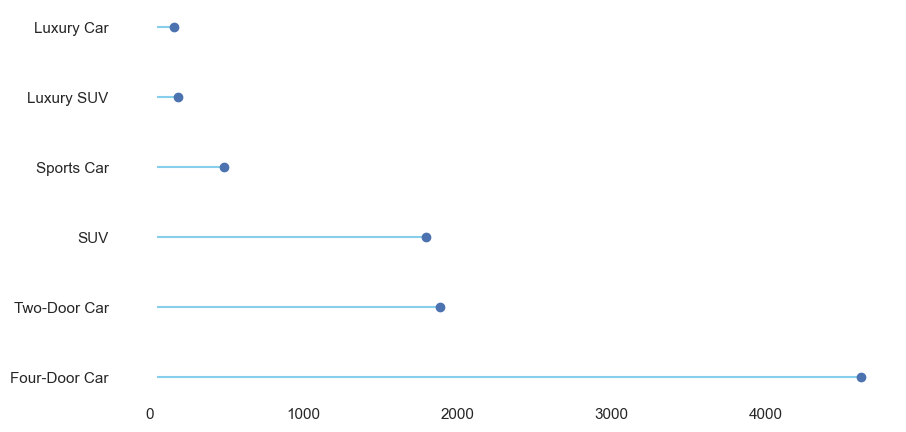

In [14]:
conteo = df_seguros['vehicle_class'].value_counts(ascending=False)

plt.figure(figsize=(10,5))
plt.hlines(y =conteo.index,
           xmin= 50,
           xmax=conteo,
           color='skyblue')
p=plt.gcf()
p.gca().set_facecolor("none")
plt.plot(conteo, conteo.index, "o");


# Visualización Aplicada: Mostrando una Variable Numérica

In [15]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_bitcoin = pd.read_csv("./data/BTC.csv")

In [16]:
df_bitcoin["fechas"] = pd.to_datetime(df_bitcoin["date"])
df_bitcoin.set_index("fechas", inplace = True)
df_bitcoin.drop("date", axis = 1, inplace = True)
df_bitcoin.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
fechas,,,,,,,,
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


### Gráficas y consideraciones

Vamos a ver:
- Histrogramas, Funciones de densidad, Combinado de ambas
- Diagramas de "cajas": Boxplot, Diagramas de enjambre, Diagramas de violín
- Diagramas de evolución/series temporales: Lineas y áreas (gráficos de evolución/se)

* **Cuándo**: 
    1. Para análisis univariante de dispersión y de outliers. 
    2. Para presentación: Solo para mostrar la forma de la distribución (por ejemplo como justificación de usar una medida de tendencia central, de asumir propiedades de distribuciones con esa forma, etc), buscar la manera de que no sea excesivamente "informativa" (no poner ejes o ponerlos solo con valores minimo y máximo), si hay que resaltar un número poner ese numero bien claro marcándolo. En general no usar boxplots ni similares salvo que la situación lo requiera (contextos científicos, donde se sepa que es un IQR, etc). 
    3. Para series (temporales o secuencias) y diagramas de evolución en Presentaciones: Mostrar la forma y usarlo como complemento estético, contextual o de refuerzo del verdadero mensaje (normalmente periodos de caída, de subida, momentos o puntos de inflexión) y remarcar el mensaje de alguna forma (rodear la zona, anotarla con matplotlib, sobredestacarla...)  

* **Cuándo no**: En presentaciones: Si te los puedes ahorrar mejor :-), salvo que el mensaje sea la propia distribución, evolución, claro.

### Distribución: Histrogramas, Funciones Densidad (KDE), Combinado


Empezamos con el histograma, ese viejo compañero ya (tanto que no te hago escribir)

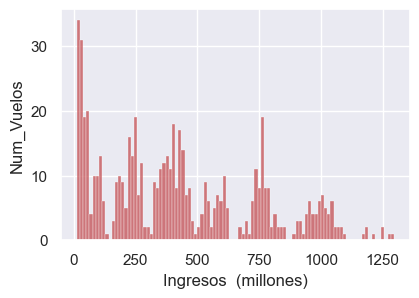

In [17]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.histplot(df_viajes["ingresos"]/1000,
             kde=False,
             color='r',
             bins=100, ax = axs) # Otra forma, sin recurrir al dataframe como argumento
axs.set_xlabel("Ingresos  (millones)")
axs.set_ylabel("Num_Vuelos");

Veamos ahora el Kernel Density Estimation (KDE) o nuestra estimación de la función de densidad:

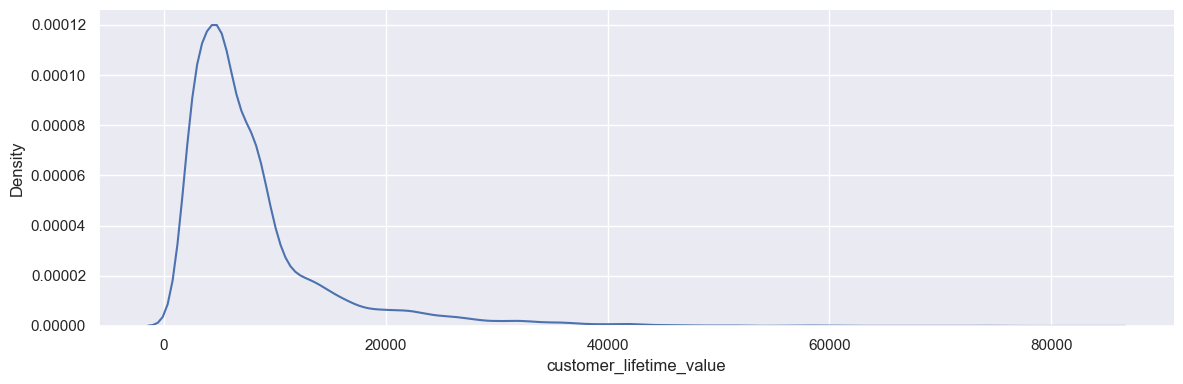

In [18]:
fg = sns.displot(x = "customer_lifetime_value", data = df_seguros, kind = "kde", height = 4, aspect= 3)
# height controla la altura del gráfico
# Aspect la relación ente ancho/alto
# Ojo este gráfico se puede asignar a un "axes" pero en realidad es para mostrar uno por "figure" (es sólo por completitud)

Y ahora los dos juntos:

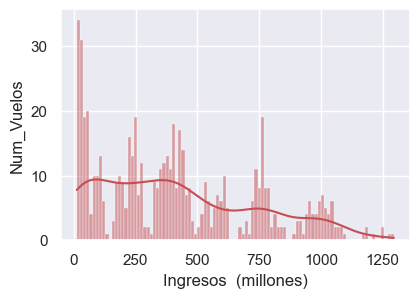

In [19]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.histplot(df_viajes["ingresos"]/1000,
             kde=True,
             color='r',
             bins=100, ax = axs) # Otra forma, sin recurrir al dataframe como argumento
axs.set_xlabel("Ingresos  (millones)")
axs.set_ylabel("Num_Vuelos");

### Distribución (II): Caja, Enjambre, Violín

#### Caja

Nuestro querido y conocido diagrama de caja:




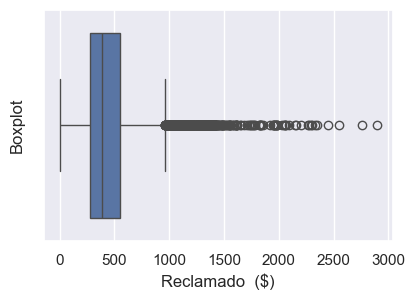

In [20]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.boxplot(x = "total_claim_amount", data = df_seguros);
axs.set_xlabel("Reclamado  ($)")
axs.set_ylabel("Boxplot");

### Enjambre 

Este es nuevo y es interesante para análisis, no sé hasta que punto lo es para visualización salvo que en él se vea algo que no se pueda mostrar de otra forma. Este diagrama nos muestra los puntos 

<Axes: xlabel='consumo_kg'>

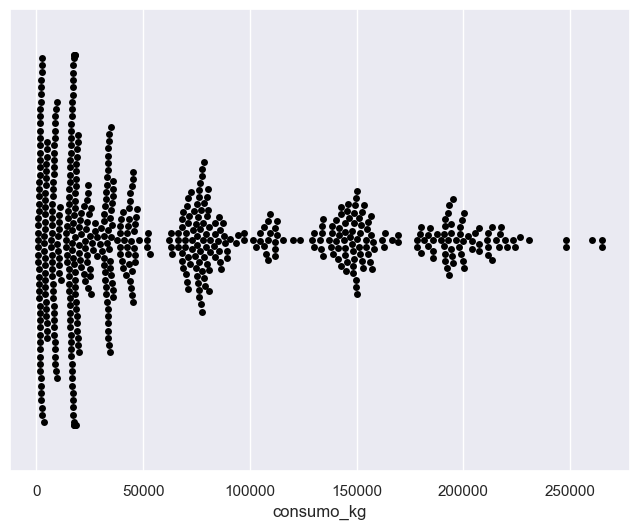

In [21]:
plt.figure(figsize = (8,6))
sns.swarmplot(x = "consumo_kg", data = df_viajes, color = "black")

Nos muestra para los valores de consumo los puntos sin solape en cada valor. Se suele complementar con un gráfico de caja o de violín para ver la dispersión y la distribución:

Nos muestra para los valores de consumo los puntos sin solape en cada valor. Se suele complementar con un gráfico de caja o de violín para ver la dispersión y la distribución:

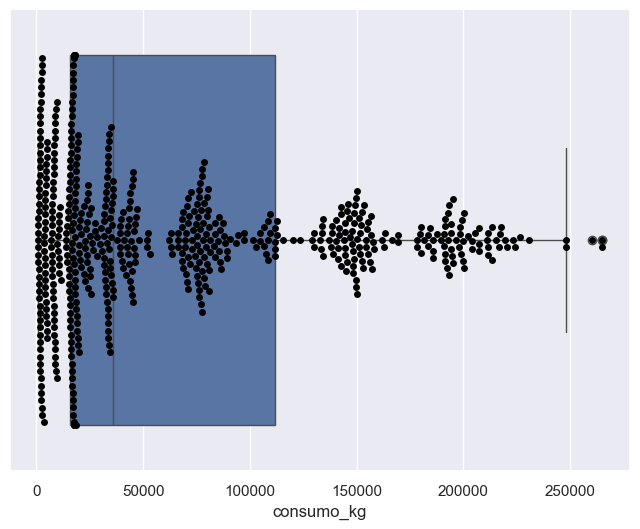

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x = "consumo_kg", data = df_viajes)
sns.swarmplot(x = "consumo_kg", data=df_viajes,
             color="black");

Y para terminar esta parte, los violines (musica maestro):

<Axes: xlabel='consumo_kg'>

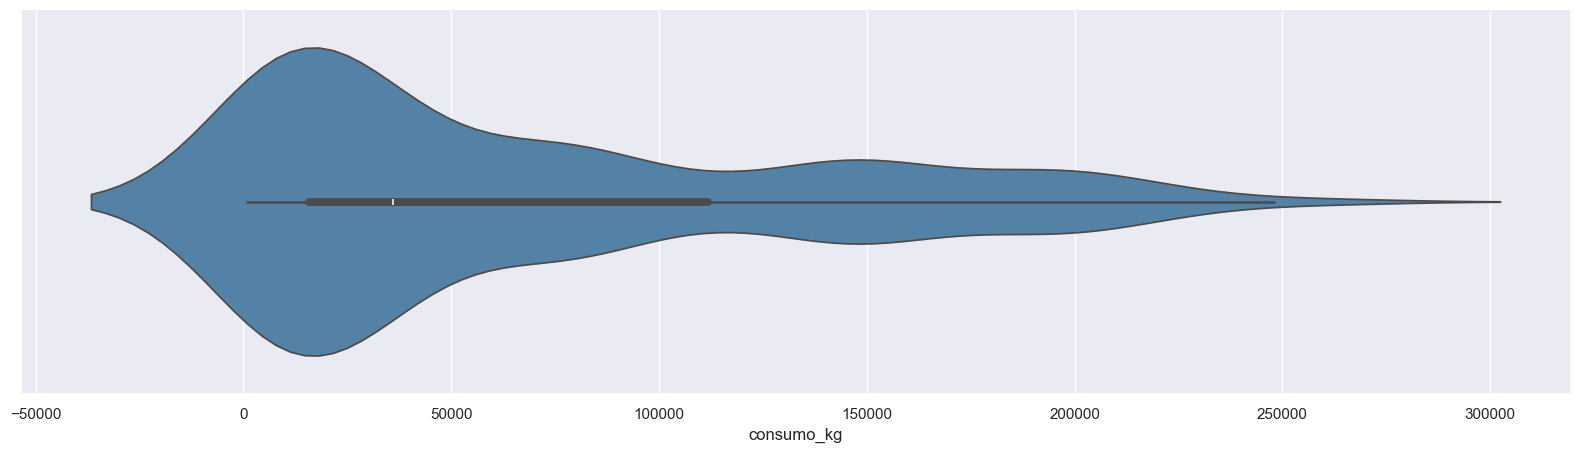

In [26]:
plt.figure(figsize = (20,5))
sns.violinplot(df_viajes["consumo_kg"], color = "steelblue", orient= "h")

### Evolución: Línea y Área

Para acabar la sesión veamos como pintar una variable cuando esta representa una secuencia de valores ordenados, como una serie temporal. El ejemplo que usamos son las cotizaciones diarias de bitcoin hasta 2022:

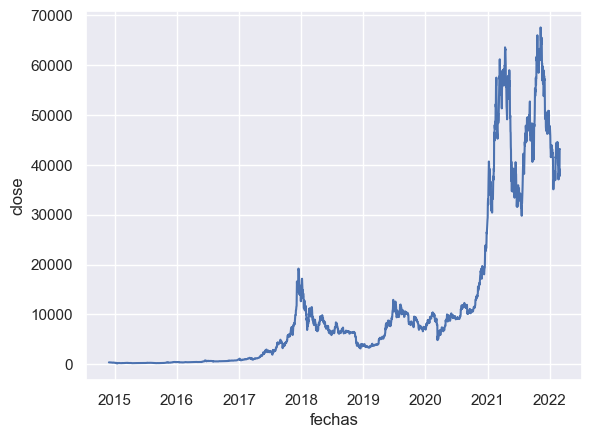

In [29]:
# Tan sencillo como pintar un gráfico de línea, escogiendo bien el eje-x, por eso cambiamos a la fecha:
sns.lineplot(x = df_bitcoin.index, y = "close", data = df_bitcoin);

En una visualización deberíamos marcar en el gráfico anterior la parte más destacada, no vale mostrarlo así... Por ejemplo haciendo uso de text y annotations, como vimos en la última sesión de la unidad anterior